In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=12
import os
os.getcwd()

'c:\\Users\\n shiva kumar\\OneDrive\\Desktop\\image_classification\\notebook'

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   'data',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

Found 9282 files belonging to 8 classes.


In [6]:
class_names=dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [7]:
len(dataset)
774*12

9288

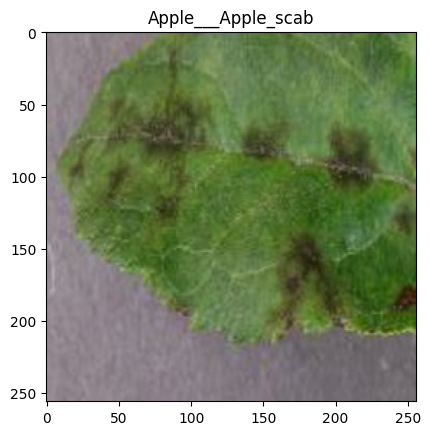

In [8]:
for image_batch,label_batch in dataset.take(1):
    image_batch.shape,label_batch.numpy()
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.show()

In [9]:
len(dataset)

774

In [10]:
train_size=0.8
print(len(dataset))
train_data_size=round(train_size*len(dataset))
print(train_data_size)
train_ds=dataset.take(train_data_size)
len(train_ds)

774
619


619

In [11]:
test_ds=dataset.skip(train_data_size)
len(test_ds)

155

In [12]:
def get_dataset_partions_df(ds,train_split=0.8,test_split=0.2,shuffle=True,shuffle_size=1000):
                ds_size=len(ds)
                train_size=int(ds_size*train_split)

                train_ds=ds.take(train_size)
                test_ds=ds.skip(train_size)
                return train_ds,test_ds

In [13]:
train_ds,test_ds=get_dataset_partions_df(dataset)

In [14]:
print(len(train_ds),len(test_ds))

619 155


In [15]:
dataset.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [16]:
for image,label in train_ds.take(1):
    print(label.numpy())
    print([class_names[i] for i in label.numpy()])

[1 7 4 5 4 0 0 3 3 4 6 4]
['Apple___Black_rot', 'Grape___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Black_rot']


In [18]:
# sample check
dataset_tr=tf.keras.preprocessing.image_dataset_from_directory(
   'C:\\Users\\n shiva kumar\\OneDrive\\Desktop\\image_classification\\artifacts\\train',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)


Found 7416 files belonging to 8 classes.


In [19]:
# sample check
dataset_te=tf.keras.preprocessing.image_dataset_from_directory(
   'C:\\Users\\n shiva kumar\\OneDrive\\Desktop\\image_classification\\artifacts\\test',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)


Found 1866 files belonging to 8 classes.


In [20]:
# sample check
dataset_ra=tf.keras.preprocessing.image_dataset_from_directory(
   'C:\\Users\\n shiva kumar\\OneDrive\\Desktop\\image_classification\\artifacts\\raw',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

Found 9282 files belonging to 8 classes.


0.20103425985778928